# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | gizo
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | zachagansk
City not found. Skipping...
Processing Record 6 of Set 1 | yeniseysk
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | daoukro
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | bougouni
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | warqla
City not found. Skipping...
Processing Record 15 of Set 1 | ponta delgada
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | riyadh
Processing Record 22 of 

Processing Record 39 of Set 4 | roebourne
Processing Record 40 of Set 4 | makokou
Processing Record 41 of Set 4 | playa del carmen
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | raha
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | port macquarie
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | biograd na moru
Processing Record 0 of Set 5 | veraval
Processing Record 1 of Set 5 | ijaki
City not found. Skipping...
Processing Record 2 of Set 5 | beyneu
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | zhezkazgan
Processing Record 6 of Set 5 | upata
Processing Record 7 of Set 5 | leh
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | ponerihouen
Processing Record 10 of Set 5 | deputatskiy
Processing Reco

Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | paytug
City not found. Skipping...
Processing Record 32 of Set 8 | numaligarh
Processing Record 33 of Set 8 | australind
Processing Record 34 of Set 8 | peniche
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | gigmoto
Processing Record 37 of Set 8 | guanica
Processing Record 38 of Set 8 | lorengau
Processing Record 39 of Set 8 | ebolowa
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | santiago de chuco
Processing Record 42 of Set 8 | forio
Processing Record 43 of Set 8 | havre
Processing Record 44 of Set 8 | sulangan
Processing Record 45 of Set 8 | yenisea
City not found. Skipping...
Processing Record 46 of Set 8 | cabedelo
Processing Record 47 of Set 8 | flin flon
Processing Record 48 of Set 8 | shenkursk
Processing Record 49 of Set 8 | lasa
Processing Record 0 of Set 9 | sal rei
Processing Record 1 of Set 9 | namibe
Processing Record 2 of Set 9 | has

Processing Record 16 of Set 12 | bilibino
Processing Record 17 of Set 12 | karaton
Processing Record 18 of Set 12 | whitianga
Processing Record 19 of Set 12 | nioro
Processing Record 20 of Set 12 | ledyard
Processing Record 21 of Set 12 | launceston
Processing Record 22 of Set 12 | inhambane
Processing Record 23 of Set 12 | san policarpo
Processing Record 24 of Set 12 | terra rica
Processing Record 25 of Set 12 | paita
Processing Record 26 of Set 12 | yeppoon
Processing Record 27 of Set 12 | mont-dore
Processing Record 28 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 12 | davenda
Processing Record 30 of Set 12 | bento goncalves
Processing Record 31 of Set 12 | zhaotong
Processing Record 32 of Set 12 | orbetello
Processing Record 33 of Set 12 | palmer
Processing Record 34 of Set 12 | timra
Processing Record 35 of Set 12 | chara
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | tiarei
Processing Record 38 of Set 12 | wajir
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cherskiy,68.75,161.30,42.85,59,0,19.01,RU,1593226948
1,rikitea,-23.12,-134.97,73.94,79,100,14.52,PF,1593226948
2,gizo,-8.10,156.84,83.48,78,79,18.92,SB,1593226948
3,hobart,-42.88,147.33,51.80,66,75,10.29,AU,1593226857
4,yeniseysk,58.45,92.17,75.96,48,100,3.76,RU,1593226948


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,19.640299,23.324077,67.877047,71.332162,49.915641,7.649701,1.593227e+09
std,33.380844,90.386350,13.984832,20.486092,39.205309,5.490732,5.759026e+01
min,-54.800000,-175.200000,30.200000,8.000000,0.000000,0.160000,1.593227e+09
25%,-7.200000,-57.760000,58.260000,61.000000,5.000000,3.400000,1.593227e+09
50%,24.690000,27.920000,69.010000,75.000000,50.000000,6.040000,1.593227e+09
75%,47.670000,98.780000,79.390000,88.000000,90.000000,10.420000,1.593227e+09
max,78.220000,178.420000,102.990000,100.000000,100.000000,33.910000,1.593227e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cherskiy,68.75,161.30,42.85,59,0,19.01,RU,1593226948
1,rikitea,-23.12,-134.97,73.94,79,100,14.52,PF,1593226948
2,gizo,-8.10,156.84,83.48,78,79,18.92,SB,1593226948
3,hobart,-42.88,147.33,51.80,66,75,10.29,AU,1593226857
4,yeniseysk,58.45,92.17,75.96,48,100,3.76,RU,1593226948


In [10]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

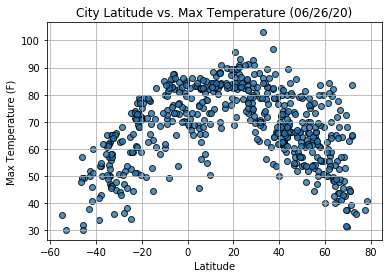

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

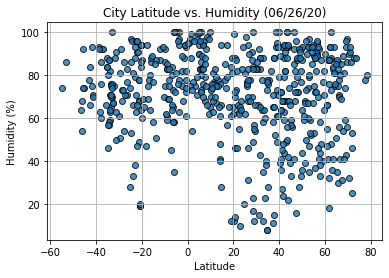

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

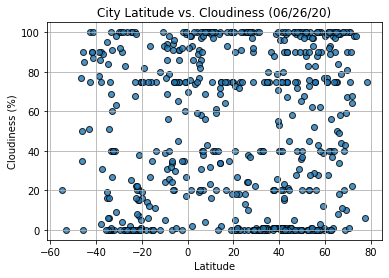

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

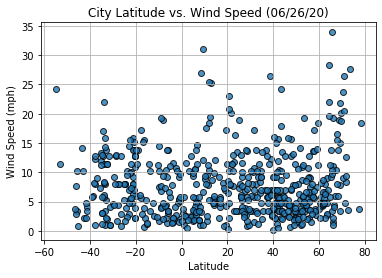

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [28]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38156682759224214


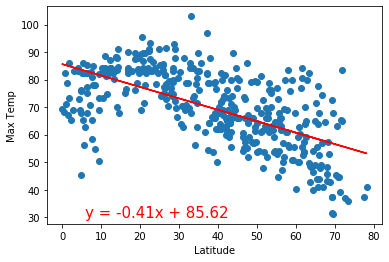

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

In [ ]:
#The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5653811804963442


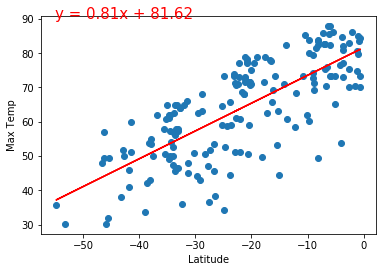

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008997481130078045


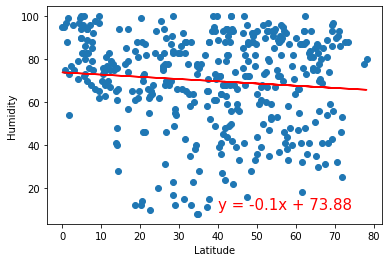

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008172028819142106


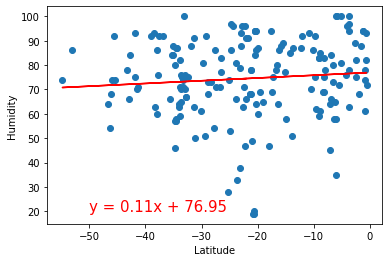

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0014288413022055574


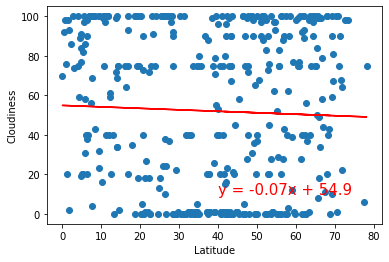

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00783379625617172


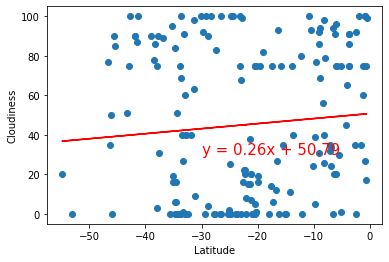

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011739805833947067


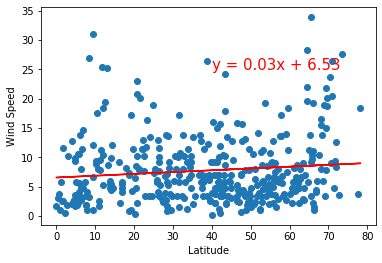

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01755410894500289


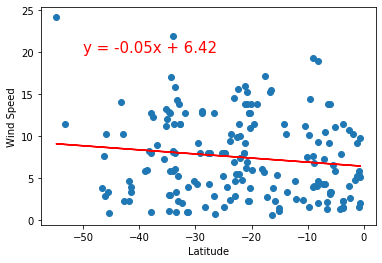

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))